In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from ode_sys import *

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# Verhulst: Saturation

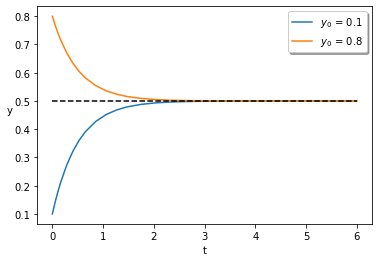

In [2]:
def sat(t, y, a):
    y1, y2 = y
    derivs = [1-a*y1,
              1-a*y2]
    return derivs

#parameter
a = 2
#initial values
y0 = [.1, .8]

#call solver
sol = solve_ivp(sat, [0, 6], y0, 'LSODA', args=(a,))
eq = np.full(sol.t.shape, 1/a)

plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])
plt.plot(sol.t, eq, 'k--')
plt.xlabel('t')
plt.ylabel('y', rotation=0)
plt.legend(['$y_0$ = %.1f' %y0[0], '$y_0$ = %.1f' %y0[1]], shadow=True)
#plt.savefig('verhulst_sat.pdf')
plt.show()

# Logistic growth

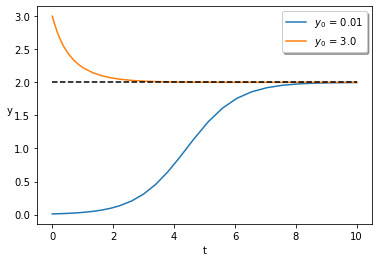

In [3]:
def log_g(t, y, params):
    y1, y2 = y
    a, K = params
    derivs = [a*y1*(1-y1/K),
              a*y2*(1-y2/K)]
    return derivs

#parameters
a = 1.2
K = 2
params = [a, K]
#initial values
y0 = [.01, 3]

#call solver
sol = solve_ivp(log_g, [0, 10], y0, 'LSODA', args=(params,))
eq = np.full(sol.t.shape, K)

plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])
plt.plot(sol.t, eq, 'k--')
plt.xlabel('t')
plt.ylabel('y', rotation=0)
plt.legend(['$y_0$ = %.2f' %y0[0], '$y_0$ = %.1f' %y0[1]], shadow=True)
#plt.savefig('log_g.pdf')
plt.show()

# Generalized log. growth

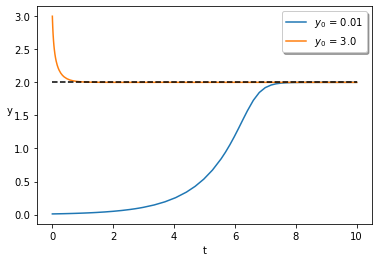

In [4]:
def log_gen(t, y, params):
    y1, y2 = y
    a, K, n = params
    derivs = [a/n*y1*(1-(y1/K)**n),
              a/n*y2*(1-(y2/K)**n)]
    return derivs

#parameters
a = 4
K = 2
n = 5
params = [a, K, n]
#initial values
y0 = [.01, 3]

#call solver
sol = solve_ivp(log_gen, [0, 10], y0, 'LSODA', args=(params,))
eq = np.full(sol.t.shape, K)

plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])
plt.plot(sol.t, eq, 'k--')
plt.xlabel('t')
plt.ylabel('y', rotation=0)
plt.legend(['$y_0$ = %.2f' %y0[0], '$y_0$ = %.1f' %y0[1]], shadow=True)
#plt.savefig('log_gen.pdf')
plt.show()

# Plots from the Paper

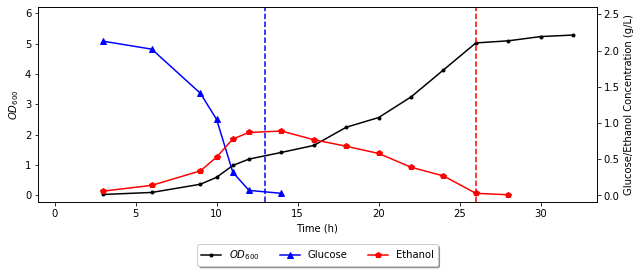

In [5]:
# data derived with the WebPlotDigitizer

t_1 = np.array([3, 6, 9, 10, 11, 12, 14])
glu = np.array([2.13, 2.02, 1.41, 1.05, .32, .07, .03])

t_2 = np.array([3, 6, 9, 10, 11, 12, 14, 16, 18, 20, 22, 24, 26, 28])
eth = np.array([.06, .14, .34, .53, .78, .87, .89, .77, .68, .58, .39, .27, .03, .01])

t_3 = np.array([3, 6, 9, 10, 11, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32])
od6 = np.array([.023, .09, .36, .59, .98, 1.19, 1.41, 1.64, 2.24, 2.56, 3.24, 4.13, 5.02, 5.09, 5.23, 5.28])

fig, ax1 = plt.subplots(figsize=(9,4))

ax1.set_xlabel('Time (h)')
ax1.set_ylabel('$OD_{600}$')
ax1.plot(t_3, od6, color='black', marker='.', label='$OD_{600}$')
ax1.set_xlim(left=-1)
ax1.set_ylim(top=6.2)

ax2 = ax1.twinx()

ax2.set_ylabel('Glucose/Ethanol Concentration (g/L)') 
ax2.plot(t_1, glu, color='blue', marker='^', label='Glucose')
ax2.plot(t_2, eth, color='red', marker='p', label='Ethanol')
ax2.set_ylim(top=2.6)

plt.axvline(x=13, color='blue', linestyle='--')
plt.axvline(x=26, color='red', linestyle='--')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=8, ncol=3, bbox_to_anchor=(.5, -.35), shadow=True)

fig.tight_layout()
#plt.savefig('from_paper.pdf')
plt.show()

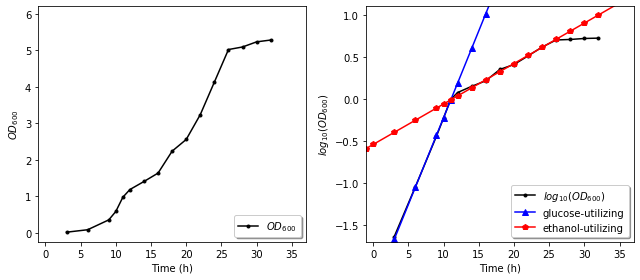

In [6]:
log_od6 = np.log10(od6)
t_3e = np.array([-1, 0, 3, 6, 9, 10, 11, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 37])

coef1 = np.polyfit(t_3[1:5],log_od6[1:5],1)
coef2 = np.polyfit(t_3[7:12],log_od6[7:12],1)
poly1d_1 = np.poly1d(coef1) 
poly1d_2 = np.poly1d(coef2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))

ax1.set_xlabel('Time (h)')
ax1.set_ylabel('$OD_{600}$')
ax1.plot(t_3, od6, color='black', marker='.', label='$OD_{600}$')
ax1.set_xlim(left=-1, right=37)
ax1.set_ylim(top=6.2)
ax1.legend(loc='lower right', shadow=True)

ax2.set_xlabel('Time (h)')
ax2.set_ylabel('$log_{10}(OD_{600})$')
ax2.plot(t_3, log_od6, color='black', marker='.', label='$log_{10}(OD_{600})$')
ax2.set_yticks(np.arange(-1.5, 1.1, step=.5))
#regression lines
ax2.plot(t_3e, poly1d_1(t_3e), color='blue', marker='^', label='glucose-utilizing')
ax2.plot(t_3e, poly1d_2(t_3e), color='red', marker='p', label='ethanol-utilizing')
ax2.set_xlim(left=-1, right=37)
ax2.set_ylim(bottom=-1.7, top=1.1)
ax2.legend(shadow=True)

fig.tight_layout()
#plt.savefig('diauxic_shift.pdf')
plt.show()

# Fitted multi-cell models

In [7]:
#whole data (invented data for a and m)
t_in = np.array([    3,    6,    9,   10,   11,    12,   14,   16,   18,   20,   22,   24,   26,   28,   30,   32])
y_in = np.array([ .023,  .09,  .36,  .59,  .98,  1.19, 1.41, 1.64, 2.24, 2.56, 3.24, 4.13, 5.02, 5.09, 5.23, 5.28])
a_in = np.array([.0046, .018, .072, .118, .196,  .238, .282,  .41,  .88, 1.28, 2.11,  2.9,  3.5,  3.5,  3.4,  3.2])
m_in = np.array([.0207, .081, .324, .531, .882, 1.071, 1.27, 1.48, 1.98, 2.18, 2.55,  2.9,  3.2,  3.1,  2.9, 2.64])
# data when the cell is not starving (s=0)
t0_in = t_in[:7]
y0_in = y_in[:7]
a0_in = a_in[:7]
m0_in = m_in[:7]
data0_in = np.array([t0_in, y0_in, a0_in, m0_in])
# data when glucose is depleted -> starvation (s=1)
t1_in = t_in[6:]
y1_in = y_in[6:]
a1_in = a_in[6:]
m1_in = m_in[6:]

## s=0

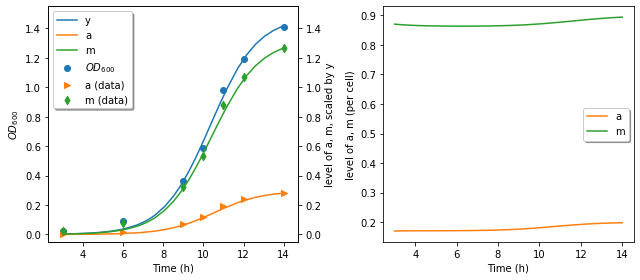

In [8]:
# parameters
K, r = 1.4801439740721747, .849793431417659 
g = 5
b, d = .1, .57
M = .9*K*(d-b/g) # -> m converges to .9*K
params = [r, K, g, M, b, d]

y0 = .00289816 # = y_l2[0] for one run we made (see fitting.ipynb)
a0, m0 = .17*y0, .87*y0
x0 = [y0, a0, m0]

sol_0l = solve_ivp(m_0l, [t0_in[0], t0_in[-1]], x0, method='LSODA', args=(params,))

plot_solutions(sol_0l, data0_in, s=0)#, save_plot=True, save_name='gu1.pdf')

# intitial values for the starvation case
x01 = [sol_0l.y[0][-1], sol_0l.y[1][-1], sol_0l.y[2][-1]]

## s=1

### Data set (by hand)

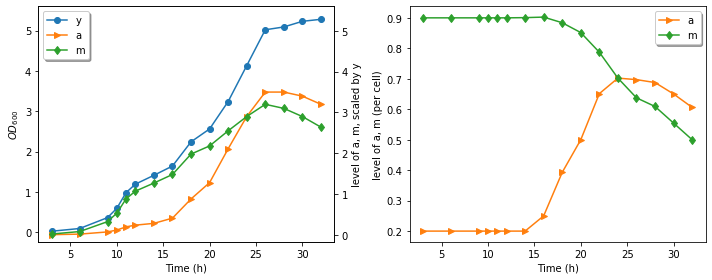

In [9]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10,4))

#first subplot
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('$OD_{600}$')
ax1.plot(t_in, y_in, label='y', marker='o')
ax1.set_ylim(top=5.6)
ax2 = ax1.twinx()
ax2.set_ylabel('level of a, m, scaled by y')
ax2.plot(t_in, a_in, label='a', color=colors[1], marker='>')
ax2.plot(t_in, m_in, label='m', color=colors[2], marker='d')
ax2.set_ylim(top=5.6)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, shadow=True)

#second subplot
ax3.set_xlabel('Time (h)')
ax3.set_ylabel('level of a, m (per cell)')
ax3.plot(t_in, a_in/y_in, label='a', color=colors[1], marker='>')
ax3.plot(t_in, m_in/y_in, label='m', color=colors[2], marker='d')
ax3.legend(shadow=True)

fig.tight_layout()
#plt.savefig('data1.pdf')
plt.show()

### First attempt with bad fit (for a)

[1.41, 0.282, 1.27]


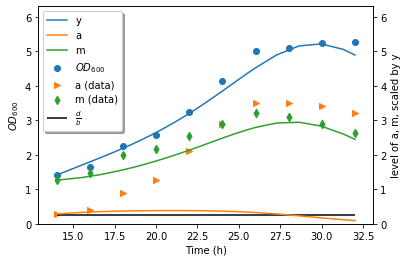

In [10]:
i=0
x1 = [y1_in[i], a1_in[i], m1_in[i]]

print(x1)

r1, K1, a1, a2 = .3, 20, .186, .5
b1, d1, Tm = .6, .15, .55
params = [r1, K1, Tm, a1, a2, b1, d1]

t_end2 = 32
sol_1e = solve_ivp(m_1e, [t1_in[i], t_end2], x1, method='LSODA', args=(params,))

fig, ax1 = plt.subplots()
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('$OD_{600}$')
ax1.plot(sol_1e.t, sol_1e.y[0], label='y', color=colors[0])
ax1.scatter(t1_in, y1_in, label='$OD_{600}$', color=colors[0], marker='o')
ax1.set_ylim(top=6.3, bottom=0)
ax2 = ax1.twinx()
ax2.set_ylabel('level of a, m, scaled by y')
ax2.plot(sol_1e.t, sol_1e.y[1], label='a', color=colors[1])
ax2.scatter(t1_in, a1_in, label='a (data)', color=colors[1], marker='>')
ax2.plot(sol_1e.t, sol_1e.y[2], label='m', color=colors[2])
ax2.scatter(t1_in, m1_in, label='m (data)', color=colors[2], marker='d')
ax2.hlines(d1/b1, t1_in[0], 32, label=r'$\frac{d}{b}$')
ax2.set_ylim(top=6.3, bottom=0)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend([h1[0]]+h2[0:2]+[h1[1]]+h2[2:], [l1[0]]+l2[0:2]+[l1[1]]+l2[2:], shadow=True)

#plt.savefig('bad_fit.pdf')
plt.show()

# Data set derived with the fist sc-model (see also fitting.ipynb)

In [11]:
# starvation-data derived with the single cell model
# starvation
t1_sc = np.array([  14,   16,   18,   20,   22,   24,   26,   28,   30,   32])
y1_sc = np.array([1.41, 1.64, 2.24, 2.56, 3.24, 4.13, 5.02, 5.09, 5.23, 5.28])
a1_sc = np.array([ .28,  .42,  .69,  .92, 1.30, 1.81, 2.34, 2.46, 2.59, 2.64])
m1_sc = np.array([1.27, 1.41, 1.85, 2.03, 2.49, 3.08, 3.64, 3.59, 3.60, 3.55])
data1_sc = np.array([t1_sc, y1_sc, a1_sc, m1_sc])
# whole data
t_sc = np.concatenate((t0_in, t1_sc[1:]), axis=0)
y_sc = np.concatenate((y0_in, y1_sc[1:]), axis=0)
a_sc = np.concatenate((a0_in, a1_sc[1:]), axis=0)
m_sc = np.concatenate((m0_in, m1_sc[1:]), axis=0)

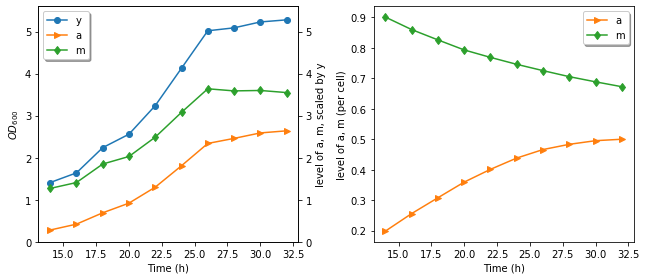

In [12]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(9,4))

#first subplot
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('$OD_{600}$')
ax1.plot(t1_sc, y1_sc, label='y', marker='o')
ax1.set_ylim(top=5.6, bottom=0)
ax2 = ax1.twinx()
ax2.set_ylabel('level of a, m, scaled by y')
ax2.plot(t1_sc, a1_sc, label='a', color=colors[1], marker='>')
ax2.plot(t1_sc, m1_sc, label='m', color=colors[2], marker='d')
ax2.set_ylim(top=5.6, bottom=0)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, shadow=True)

#second subplot
ax3.set_xlabel('Time (h)')
ax3.set_ylabel('level of a, m (per cell)')
ax3.plot(t1_sc, a1_sc/y1_sc, label='a', color=colors[1], marker='>')
ax3.plot(t1_sc, m1_sc/y1_sc, label='m', color=colors[2], marker='d')
ax3.legend(shadow=True)

fig.tight_layout()
#plt.savefig('data2.pdf')
plt.show()

## Better fit for s=1

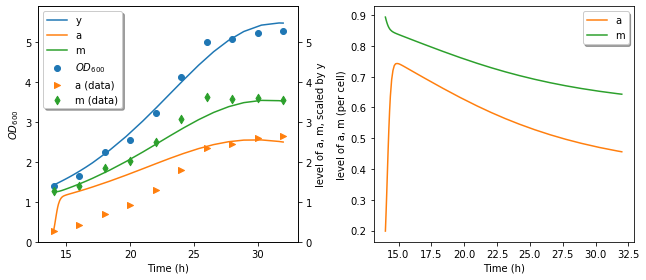

In [13]:
r1, K1, a1 = .364, 53, 6.
d1, Tm = .093, .645
a2 = 1.526*a1
b1 = 2.145*d1

params = [r1, K1, Tm, a1, a2, b1, d1]
sol_1l = solve_ivp(m_1l, [14, 32], x01, 'LSODA', args=(params,))

plot_solutions(sol_1l, data1_sc)#, save_plot=True, save_name='starvation2.pdf')

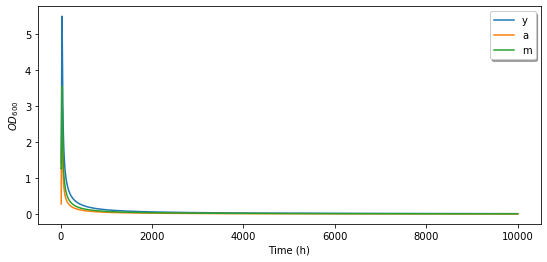

y(10000) = 0.012398765537777353
a(10000) = 0.005280426714926621
m(10000) = 0.0077231702081845145


In [14]:
sol_1l2 = solve_ivp(m_1l, [14, 10000], x01, 'LSODA', args=(params,))

y_1l2, a_1l2, m_1l2 = sol_1l2.y[0:3]
t_1l2 = sol_1l2.t

plt.figure(figsize=(9,4))
plt.plot(t_1l2, y_1l2, label='y')
plt.plot(t_1l2, a_1l2, label='a')
plt.plot(t_1l2, m_1l2, label='m')
plt.xlabel('Time (h)')
plt.ylabel('$OD_{600}$')
plt.legend(shadow=True)
#plt.savefig('starvation_12.pdf')
plt.show()

print('y(10000) = ' + str(y_1l2[-1]))
print('a(10000) = ' + str(a_1l2[-1]))
print('m(10000) = ' + str(m_1l2[-1]))

## Same with d/b*y plotted

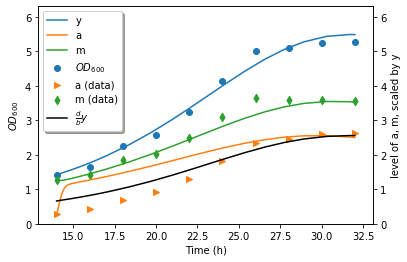

In [15]:
r1, K1, a1 = .364, 53, 6.
d1, Tm = .093, .645
a2 = 1.526*a1
b1 = 2.145*d1
params = [r1, K1, Tm, a1, a2, b1, d1]

sol_1l3 = solve_ivp(m_1l, [14, 32], x01, 'LSODA', args=(params,))

y_1l3, a_1l3, m_1l3 = sol_1l3.y[0:3]
t_1l3 = sol_1l3.t

fig, ax1 = plt.subplots()
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('$OD_{600}$')
ax1.plot(t_1l3, y_1l3, label='y', color=colors[0])
ax1.scatter(t1_sc, y1_sc, label='$OD_{600}$', color=colors[0], marker='o')
ax1.set_ylim(top=6.3, bottom=0)
ax2 = ax1.twinx()
ax2.set_ylabel('level of a, m, scaled by y')
ax2.plot(t_1l3, a_1l3, label='a', color=colors[1])
ax2.scatter(t1_sc, a1_sc, label='a (data)', color=colors[1], marker='>')
ax2.plot(t_1l3, m_1l3, label='m', color=colors[2])
ax2.scatter(t1_sc, m1_sc, label='m (data)', color=colors[2], marker='d')
ax2.plot(t_1l3, y_1l3*d1/b1, label=r'$\frac{d}{b}y$', color='black')
ax2.set_ylim(top=6.3, bottom=0)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend([h1[0]]+h2[0:2]+[h1[1]]+h2[3:5]+[h2[2]],
           [l1[0]]+l2[0:2]+[l1[1]]+l2[3:5]+[l2[2]], shadow=True)

#plt.savefig('starvation2db.pdf')
plt.show()

## Whole plot

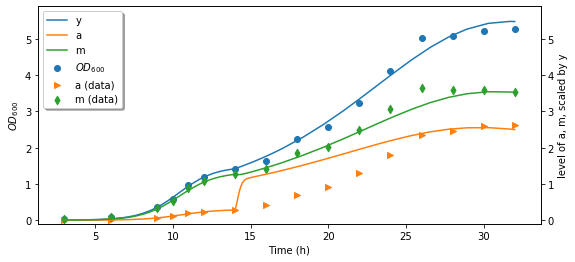

In [16]:
tw = np.concatenate((sol_0l.t, sol_1l.t[1:]), axis=0)
yw = np.concatenate((sol_0l.y[0], sol_1l.y[0][1:]), axis=0)
aw = np.concatenate((sol_0l.y[1], sol_1l.y[1][1:]), axis=0)
mw = np.concatenate((sol_0l.y[2], sol_1l.y[2][1:]), axis=0)

fig, ax1 = plt.subplots(figsize=(9,4))
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('$OD_{600}$')
ax1.plot(tw, yw, label='y', color=colors[0])
ax1.scatter(t_sc, y_sc, label='$OD_{600}$', color=colors[0], marker='o')
ax1.set_ylim(top=5.9, bottom=-.1)
ax2 = ax1.twinx()
ax2.set_ylabel('level of a, m, scaled by y')
ax2.plot(tw, aw, label='a', color=colors[1])
ax2.scatter(t_sc, a_sc, label='a (data)', color=colors[1], marker='>')
ax2.plot(tw, mw, label='m', color=colors[2])
ax2.scatter(t_sc, m_sc, label='m (data)', color=colors[2], marker='d')
ax2.set_ylim(top=5.9, bottom=-.1)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend([h1[0]]+h2[0:2]+[h1[1]]+h2[2:4], [l1[0]]+l2[0:2]+[l1[1]]+l2[2:4], shadow=True)

#plt.savefig('whole1.pdf')
plt.show()

# With generalized logistic growth

## s=0

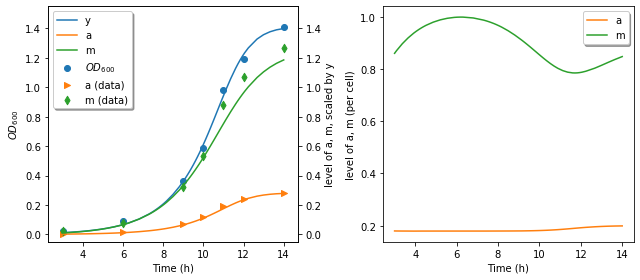

In [17]:
#parameters
r, n, K = 1.3819066797483224, 2.429362977019412, 1.413931678779375
g = 5
b, d = .029, .48
M = .9*K*(d-b/g) #-> m converges to .9*K
paramsg = [r, n, K, g, M, b, d]
#initial values
y0g = .01203952 #=y_g2[0]
a0g, m0g = .18*y0g, .86*y0g
x0g = [y0g, a0g, m0g]

sol_0g = solve_ivp(m_0g, [3, 14], x0g, method='LSODA', args=(paramsg,))

plot_solutions(sol_0g, data0_in, s=0)#, save_plot=True, save_name='gu2.pdf')

x01g = [sol_0g.y[0][-1], sol_0g.y[1][-1], sol_0g.y[2][-1]]

## s=1

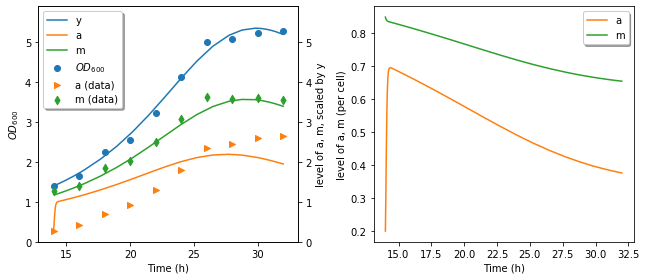

In [18]:
#parameters (derived with scipy minimize and a customized objective function)
r1, n1, K1, Tm = .81570673, 1.94896191, 57.46757584, .66521046
a1, a2 = 19.94995054, 35.97842182
b1, d1 = .21027698, .0851718
paramsc = [r1, n1, K1, Tm, a1, a2, b1, d1]

sol_1g = solve_ivp(m_1g, [14, 32], x01g, 'LSODA', args=(paramsc,))

plot_solutions(sol_1g, data1_sc)#, save_plot=True, save_name='starvation2g.pdf')

## Whole plot

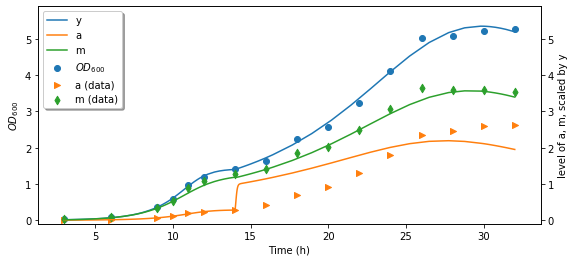

In [19]:
tg = np.concatenate((sol_0g.t, sol_1g.t), axis=0)
yg = np.concatenate((sol_0g.y[0], sol_1g.y[0]), axis=0)
ag = np.concatenate((sol_0g.y[1], sol_1g.y[1]), axis=0)
mg = np.concatenate((sol_0g.y[2], sol_1g.y[2]), axis=0)

fig, ax1 = plt.subplots(figsize=(9,4))
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('$OD_{600}$')
ax1.plot(tg, yg, label='y', color=colors[0])
ax1.scatter(t_sc, y_sc, label='$OD_{600}$', color=colors[0], marker='o')
ax1.set_ylim(top=5.9, bottom=-.1)
ax2 = ax1.twinx()
ax2.set_ylabel('level of a, m, scaled by y')
ax2.plot(tg, ag, label='a', color=colors[1])
ax2.scatter(t_sc, a_sc, label='a (data)', color=colors[1], marker='>')
ax2.plot(tg, mg, label='m', color=colors[2])
ax2.scatter(t_sc, m_sc, label='m (data)', color=colors[2], marker='d')
ax2.set_ylim(top=5.9, bottom=-.1)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend([h1[0]]+h2[0:2]+[h1[1]]+h2[2:4], [l1[0]]+l2[0:2]+[l1[1]]+l2[2:4], shadow=True)

#plt.savefig('whole2.pdf')
plt.show()

## Compare both curves for Y

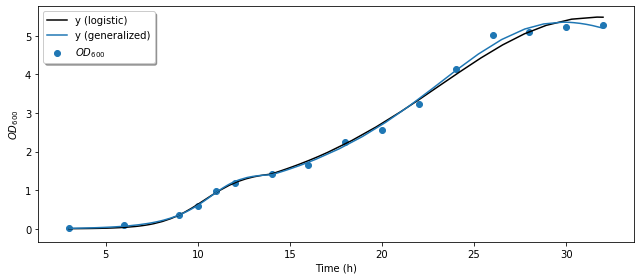

In [20]:
plt.figure(figsize=(9,4))
plt.plot(tw, yw, label='y (logistic)', color='black')
plt.plot(tg, yg, label='y (generalized)', color=colors[0])
plt.scatter(t_sc, y_sc, label='$OD_{600}$')
plt.xlabel('Time (h)')
plt.ylabel('$OD_{600}$')
plt.legend(shadow=True)
plt.tight_layout()
#plt.savefig('diff_y.pdf')
plt.show()

# Modifications of $\dot m$

## First modification

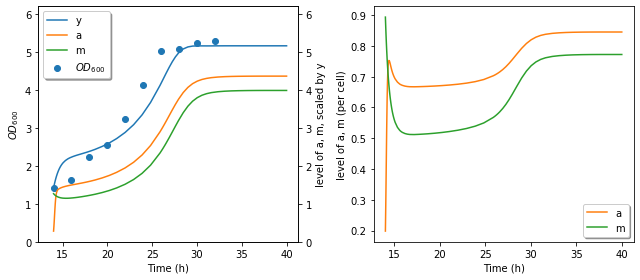

In [21]:
#set d1 = 1.2865*b1 for the fitting
r1, K1, Tm = 1.984, 5.162, .500
a1, a2 = 9.668, 6.566, 
b1 = .163
d1 = 1.2865*b1
params_1d = [r1, K1, Tm, a1, a2, b1, d1]

sol_1d = solve_ivp(m_1d, [14, 40], x01, 'LSODA', args=(params_1d,))

y, a, m = sol_1d.y[0:3]
t = sol_1d.t

#plot_solutions(sol_1d, data1_sc)#, save_plot=True, save_name='mod_1_1.pdf')

#plot without the data points for a and m
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(9,4))

#first subplot
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('$OD_{600}$')
ax1.plot(t, y, label='y', color=colors[0])
ax1.scatter(t1_sc, y1_sc, label='$OD_{600}$', color=colors[0])
ax1.set_ylim(top=6.2, bottom=0)
ax2 = ax1.twinx()
ax2.set_ylabel('level of a, m, scaled by y')
ax2.plot(t, a, label='a', color=colors[1])
ax2.plot(t, m, label='m', color=colors[2])
ax2.set_ylim(top=6.2, bottom=0)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend([h1[0]]+h2[0:2]+[h1[1]]+h2[2:4], [l1[0]]+l2[0:2]+[l1[1]]+l2[2:4], shadow=True)

#second subplot
ax3.set_xlabel('Time (h)')
ax3.set_ylabel('level of a, m (per cell)')
ax3.plot(t, a/y, label='a', color=colors[1])
ax3.plot(t, m/y, label='m', color=colors[2])
ax3.legend(shadow=True)

fig.tight_layout()
#plt.savefig('mod_1_1.pdf')
plt.show()

## Adaption of the first modification

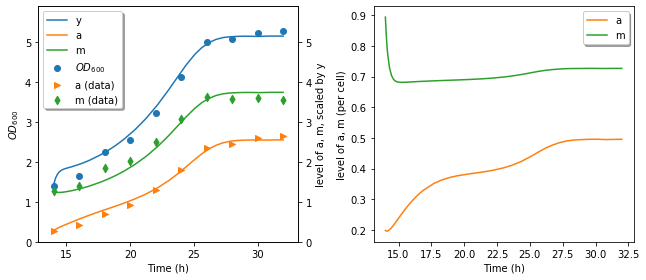

In [22]:
#parameters
r1, K1, Tm = 4.530153836535905, 5.155822859681016, .672
a1, a2 = .9420682080843957, 1.7377956657273594
b1, d1, Ty = 2.1860515775730747, .024898361992930614, .7298085885763022
params_1d2 = [r1, K1, Tm, a1, a2, b1, d1, Ty]

sol_1d2 = solve_ivp(m_1d2, [14, 32], x01, method='LSODA', args=(params_1d2,))

plot_solutions(sol_1d2, data1_sc)#, save_plot=True, save_name='mod_1_2.pdf')

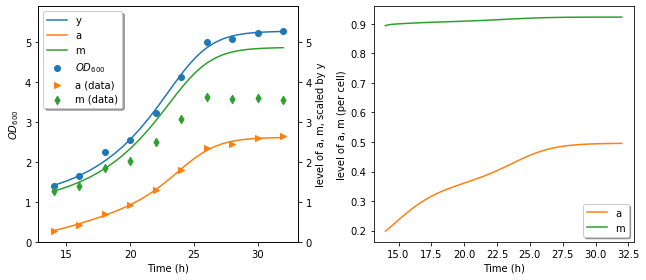

In [23]:
r1, K1, Tm = 2.4944097900751787, 5.28029177673666, .870949265203856
a1, a2 = 1.4587690241816567, 9.552509450128724
b1, d1 = 9.223730441798079, .0033533819911944897
Ty = .215/b1-3.217*d1/b1+.901
params_1d3 = [r1, K1, Tm, a1, a2, b1, d1, Ty]

sol_1d3 = solve_ivp(m_1d2, [14, 32], x01, 'LSODA', args=(params_1d3,))

plot_solutions(sol_1d3, data1_sc)#, save_plot=True, save_name='mod_1_3.pdf')

## Second modification

[1.26737137 1.26634876 1.26530532 1.25864248 1.25173516 1.24509317
 1.23546993 1.22972073 1.22840799 1.23125817 1.24214394 1.25485649
 1.2698145  1.28605927 1.302513   1.31945646 1.33674732 1.35336679
 1.37016685 1.38712152 1.40340006 1.41979634 1.43630586 1.51817493
 1.60263099 1.68972277 1.91951984 2.16681284 2.43137639 2.68549182
 2.94498224 2.98222265 3.01931547 3.09240315 3.16372029 3.27914404
 3.38371755 3.4703311  3.52234827 3.54750011 3.5415912  3.50436
 3.42718845 3.26383206 3.13844599]


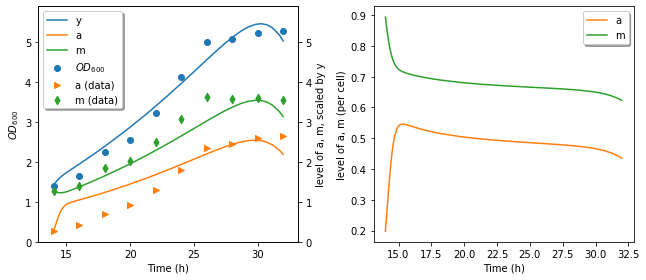

In [24]:
#parameters
r1, K1, Tm = 1.0087272776202856, 40.80756726756603, .6478166024785968
a1 = 3.2217885769458685
d1 = .7497827673538797
a2 = 1.526*a1
b1 = 2.145*d1
params_1y = [r1, K1, Tm, a1, a2, b1, d1]

sol_1y = solve_ivp(m_1y, [14, 32], x01, 'LSODA', args=(params_1y,))
print(sol_1y.y[2])

plot_solutions(sol_1y, data1_sc)#, save_plot=True, save_name='starvation_y.pdf')

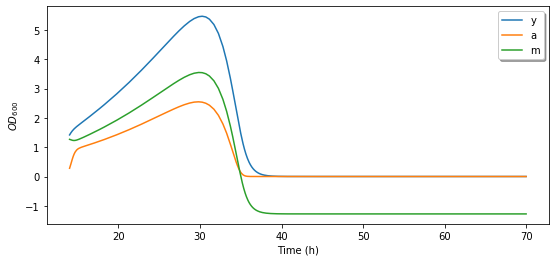

y(70) = 5.868430137403269e-12
a(70) = 6.329683205152421e-14
m(70) = -1.276049046521142


In [25]:
sol_1y2 = solve_ivp(m_1y, [14,70], x01, 'LSODA', args=(params_1y,))

y_1y2, a_1y2, m_1y2 = sol_1y2.y[0:3]
t_1y2 = sol_1y2.t

plt.figure(figsize=(9,4))
plt.plot(t_1y2, y_1y2, label='y')
plt.plot(t_1y2, a_1y2, label='a')
plt.plot(t_1y2, m_1y2, label='m')
plt.xlabel('Time (h)')
plt.ylabel('$OD_{600}$')
plt.legend(shadow=True)
#plt.savefig('starvation_1y2.pdf')
plt.show()

print('y(70) = ' + str(y_1y2[-1]))
print('a(70) = ' + str(a_1y2[-1]))
print('m(70) = ' + str(m_1y2[-1]))

### Negative $\dot m$

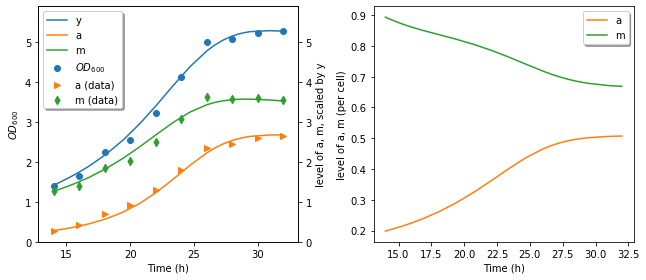

In [26]:
#parameters
r1, K1, Tm = .3610402147878471, 14.93470846029889, .672
a1, a2 = .1741920909034433, .26027862251141193
b1, d1 = .18705182750308452, .0935790357918391
params_1m = [r1, K1, Tm, a1, a2, b1, d1]

sol_1m = solve_ivp(m_1m, [14, 32], x01, 'LSODA', args=(params_1m,))

plot_solutions(sol_1m, data1_sc)#, save_plot=True, save_name='starvation_m.pdf')

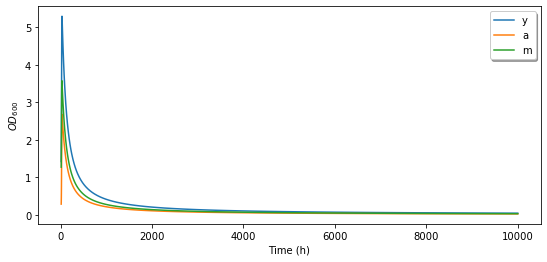

y(10000) = 0.039501126652846746
a(10000) = 0.020302570787349733
m(10000) = 0.026263837133085534


In [27]:
sol_1m2 = solve_ivp(m_1m, [14, 10000], x01, 'LSODA', args=(params_1m,))

y_1m2, a_1m2, m_1m2 = sol_1m2.y[0:3]
t_1m2 = sol_1m2.t

plt.figure(figsize=(9,4))
plt.plot(t_1m2, y_1m2, label='y')
plt.plot(t_1m2, a_1m2, label='a')
plt.plot(t_1m2, m_1m2, label='m')
plt.xlabel('Time (h)')
plt.ylabel('$OD_{600}$')
plt.legend(shadow=True)
#plt.savefig('starvation_m2.pdf')
plt.show()

print('y(10000) = ' + str(y_1m2[-1]))
print('a(10000) = ' + str(a_1m2[-1]))
print('m(10000) = ' + str(m_1m2[-1]))

## Third modification

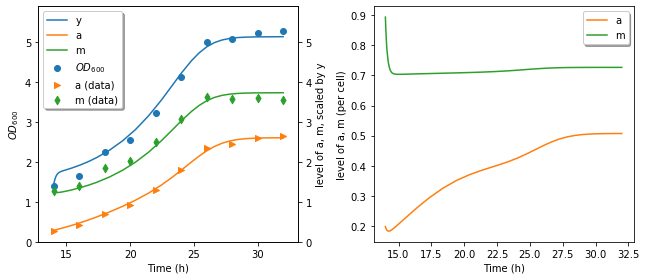

In [28]:
#parameters
r1, K1, Tm = 6.607682705570198, 5.143422883668531, .69679544430603
a1, a2 = .5157881010810613, .9293444104759587
b1, d1 = 3.208759002703862, 4.414748255442791
params_1c = [r1, K1, Tm, a1, a2, b1, d1]

sol_1c = solve_ivp(m_1c, [14, 32], x01, 'LSODA', args=(params_1c,))

plot_solutions(sol_1c, data1_sc)#, save_plot=True, save_name='mod_1_4.pdf')

# Plots of the single-cell models

## Example for boundedness of the first model

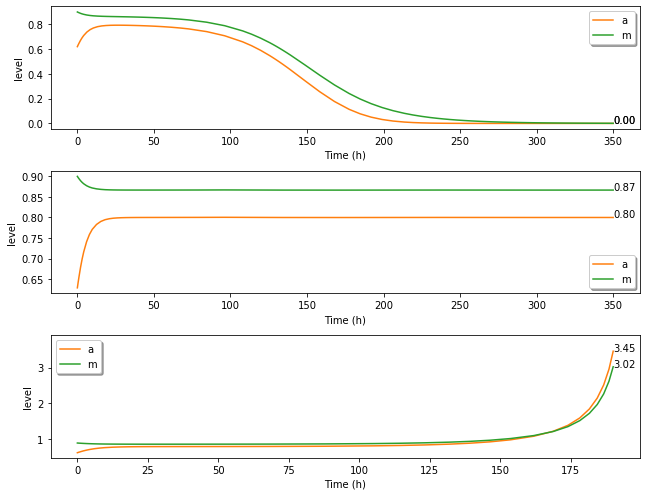

In [29]:
#parameters
a1, a2 = .2, .3
b, d = .04, .032
params = [a1, a2, b, d]

#initial values for bounded solution
y0b=[.62, .9]
#initial values for limiting case
y0l=[.6288, .9]
#initial values for unbounded solution
y0u=[.63, .9]

solb = solve_ivp(sc1_1, [0, 350], y0b, method='LSODA', args=(params,))
soll = solve_ivp(sc1_1, [0, 350], y0l, method='LSODA', args=(params,))
solu = solve_ivp(sc1_1, [0, 190], y0u, method='LSODA', args=(params,))

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9,7))

#first subplot
ax1.plot(solb.t, solb.y[0], label='a', color=colors[1])
ax1.plot(solb.t, solb.y[1], label='m', color=colors[2])
ax1.annotate('{number:.{digits}f}'.format(number=solb.y[0][-1], digits=2),
             xy=(solb.t[-1],solb.y[0][-1]), textcoords='data')
ax1.annotate('{number:.{digits}f}'.format(number=solb.y[1][-1], digits=2),
             xy=(solb.t[-1],solb.y[1][-1]), textcoords='data')
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('level')
ax1.legend(shadow=True)

#second subplot
ax2.plot(soll.t, soll.y[0], label='a', color=colors[1])
ax2.plot(soll.t, soll.y[1], label='m', color=colors[2])
ax2.annotate('{number:.{digits}f}'.format(number=soll.y[0][-1], digits=2),
             xy=(soll.t[-1],soll.y[0][-1]), textcoords='data')
ax2.annotate('{number:.{digits}f}'.format(number=soll.y[1][-1], digits=2),
             xy=(soll.t[-1],soll.y[1][-1]), textcoords='data')
ax2.set_xlabel('Time (h)')
ax2.set_ylabel('level')
ax2.legend(shadow=True)

#third subplot
ax3.plot(solu.t, solu.y[0], label='a', color=colors[1])
ax3.plot(solu.t, solu.y[1], label='m', color=colors[2])
ax3.annotate('{number:.{digits}f}'.format(number=solu.y[0][-1], digits=2),
             xy=(solu.t[-1],solu.y[0][-1]), textcoords='data')
ax3.annotate('{number:.{digits}f}'.format(number=solu.y[1][-1], digits=2),
             xy=(solu.t[-1],solu.y[1][-1]), textcoords='data')
ax3.set_xlabel('Time (h)')
ax3.set_ylabel('level')
ax3.set_ylim(top=3.9)
ax3.legend(shadow=True)

fig.tight_layout()
#plt.savefig('bound_a0.pdf')
plt.show()

### Same with higher initial value for m

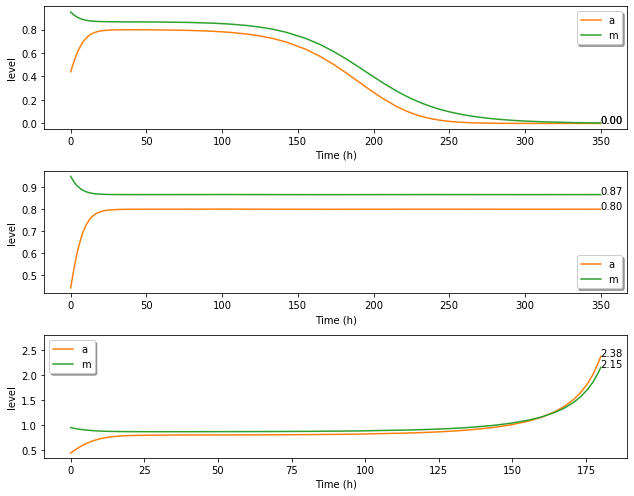

In [30]:
#initial values for bounded solution
y0b=[.44, .95]
#initial values for limiting case
y0l=[.44089, .95]
#initial values for unbounded solution
y0u=[.442, .95]

solb = solve_ivp(sc1_1, [0, 350], y0b, method='LSODA', args=(params,))
soll = solve_ivp(sc1_1, [0, 350], y0l, method='LSODA', args=(params,))
solu = solve_ivp(sc1_1, [0, 180], y0u, method='LSODA', args=(params,))

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9,7))

#first subplot
ax1.plot(solb.t, solb.y[0], label='a', color=colors[1])
ax1.plot(solb.t, solb.y[1], label='m', color=colors[2])
ax1.annotate('{number:.{digits}f}'.format(number=solb.y[0][-1], digits=2),
             xy=(solb.t[-1],solb.y[0][-1]), textcoords='data')
ax1.annotate('{number:.{digits}f}'.format(number=solb.y[1][-1], digits=2),
             xy=(solb.t[-1],solb.y[1][-1]), textcoords='data')
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('level')
ax1.legend(shadow=True)

#second subplot
ax2.plot(soll.t, soll.y[0], label='a', color=colors[1])
ax2.plot(soll.t, soll.y[1], label='m', color=colors[2])
ax2.annotate('{number:.{digits}f}'.format(number=soll.y[0][-1], digits=2),
             xy=(soll.t[-1],soll.y[0][-1]), textcoords='data')
ax2.annotate('{number:.{digits}f}'.format(number=soll.y[1][-1], digits=2),
             xy=(soll.t[-1],soll.y[1][-1]), textcoords='data')
ax2.set_xlabel('Time (h)')
ax2.set_ylabel('level')
ax2.legend(shadow=True)

#third subplot
ax3.plot(solu.t, solu.y[0], label='a', color=colors[1])
ax3.plot(solu.t, solu.y[1], label='m', color=colors[2])
ax3.annotate('{number:.{digits}f}'.format(number=solu.y[0][-1], digits=2),
             xy=(solu.t[-1],solu.y[0][-1]), textcoords='data')
ax3.annotate('{number:.{digits}f}'.format(number=solu.y[1][-1], digits=2),
             xy=(solu.t[-1],solu.y[1][-1]), textcoords='data')
ax3.set_xlabel('Time (h)')
ax3.set_ylabel('level')
ax3.set_ylim(top=2.8)
ax3.legend(shadow=True)

fig.tight_layout()
#plt.savefig('bound_a0_2.pdf')
plt.show()

## Example for c bounded in the second model

In [31]:
#parameter
a1, a2 = .2, .205
b1, b2, d1 = .02, .0065, .015
g1, g2, d2 = .235, .1, .075
params = [a1, a2, b1, b2, d1, g1, g2, d2]

a0, m0, c0 = .2, .9, .8
y0 = [a0, m0, c0]

#if true: condition is fulfilled such that P2 and P3 are not relevant
xi1 = b1*g1 - b2*g2
xi2 = xi1 - b2*d2
U1 = a2/a1*xi1
V1 = (a1-a2)/a1*xi1 - d1*g2 - a2/a1*xi2
W1 = -(a1-a2)/a1*xi2 + d1*(g2 + d2)
print((V1**2 - 4*U1*W1)<0)

True


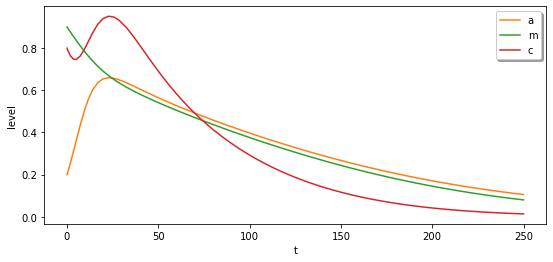

In [32]:
#call solver
sol = solve_ivp(sc2_1, [0, 250], y0, 'LSODA', args=(params,))

#plot solution
plt.figure(figsize=(9,4))
plt.plot(sol.t, sol.y[0], label='a', color=colors[1])
plt.plot(sol.t, sol.y[1], label='m', color=colors[2])
plt.plot(sol.t, sol.y[2], label='c', color=colors[3])
plt.xlabel('t')
plt.ylabel('level')
plt.legend(shadow=True)
#plt.savefig('catabolites.pdf')
plt.show()

## Plots of the first Model

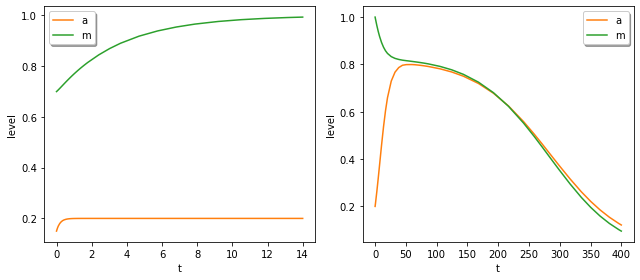

In [33]:
#s=0
g, b, d = 5, .6, .4
M = d-b/g #-> m converges to 1
params_0 = [g, M, b, d]

sol_0 = solve_ivp(sc1_0, [0, 14], [.15, .7], 'LSODA', args=(params_0,))
a, m, t = sol_0.y[0], sol_0.y[1], sol_0.t

#s=1
a1, a2, b1, d1 = .13, .14, .022, .018
params_1 = [a1, a2, b1, d1]

sol_1 = solve_ivp(sc1_1, [0, 400], [.2, 1], 'LSODA', args=(params_1,))
a1, m1, t1 = sol_1.y[0], sol_1.y[1], sol_1.t

#plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,4))

#first plot
ax1.plot(t, a, label='a', color=colors[1])
ax1.plot(t, m, label='m', color=colors[2])
ax1.set_xlabel('t')
ax1.set_ylabel('level')
ax1.legend(shadow=True)

#second plot
ax2.plot(t1, a1, label='a', color=colors[1])
ax2.plot(t1, m1, label='m', color=colors[2])
ax2.set_xlabel('t')
ax2.set_ylabel('level')
ax2.legend(shadow=True)

fig.tight_layout()
#plt.savefig('ex_mod1.pdf')
plt.show()

## Plots of the second Model

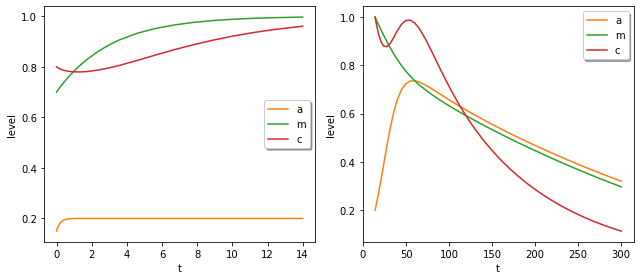

In [34]:
#s=0
g = 5
b1, b2, d1 = .02, .04, .3
g1, g2, d2 = .9, .05, .2
M = .2*b2+d1  #-> m converges to 1
C = d2-.2*g1 #-> c converges to 1
params_0c = [g, M, b1, b2, d1, C, g1, g2, d2]

sol_0c = solve_ivp(sc2_0, [0, 14], [.15, .7, .8], 'LSODA', args=(params_0c,))
a, m, c, t = sol_0c.y[0], sol_0c.y[1], sol_0c.y[2], sol_0c.t

#s=1
a1, a2 = .1, .1025, 
b1, b2, d1 = .015, .00325, .0075
g1, g2, d2 = .1175, .09, .045
params_1c = [a1, a2, b1, b2, d1, g1, g2, d2]

sol_1c = solve_ivp(sc2_1, [14, 300], [.2, 1, 1], 'LSODA', args=(params_1c,))
a1, m1, c1, t1 = sol_1c.y[0], sol_1c.y[1], sol_1c.y[2], sol_1c.t

#plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,4))

#first plot
ax1.plot(t, a, label='a', color=colors[1])
ax1.plot(t, m, label='m', color=colors[2])
ax1.plot(t, c, label='c', color=colors[3])
ax1.set_xlabel('t')
ax1.set_ylabel('level')
ax1.legend(shadow=True)

#second plot
ax2.plot(t1, a1, label='a', color=colors[1])
ax2.plot(t1, m1, label='m', color=colors[2])
ax2.plot(t1, c1, label='c', color=colors[3])
ax2.set_xlabel('t')
ax2.set_ylabel('level')
ax2.legend(shadow=True)
#ax2.ylim(0,1.1)

fig.tight_layout()
#plt.savefig('ex_mod2.pdf')
plt.show()